<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN Regression Project-Addvertising

## About Dataset
The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get Dataset

In [3]:
df=pd.read_csv('Advertising.csv')

## EDA

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Clean Data

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Visualization

### Box Plot

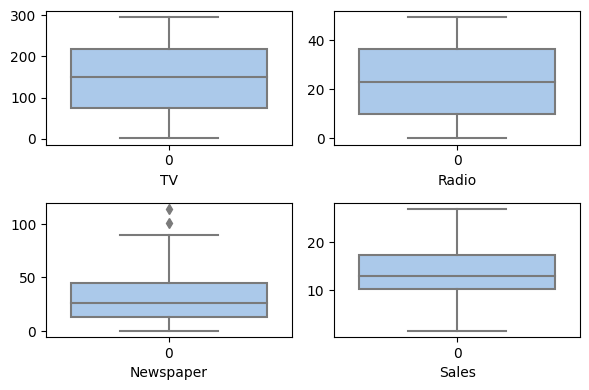

In [11]:
plt.figure(figsize=(6,4))
columns = {0:'TV',1:'Radio',2:'Newspaper',3:'Sales'}
for plot,col in columns.items():
  plt.subplot(2,2, plot+1)
  sns.boxplot(data=df[col],palette="pastel")
  plt.xlabel(col)
plt.tight_layout()
plt.show()

## Corrolation of features

In [12]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


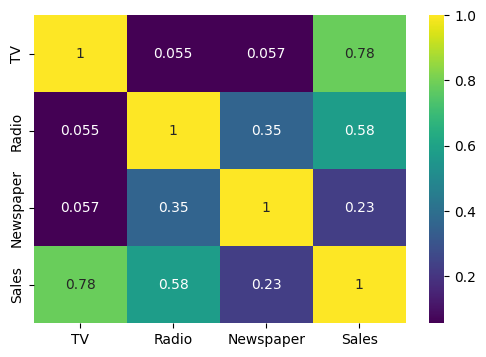

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

### The correlation between TV, Radio and Newspaper advertising with Sales are
### 0.78,0.58,0.23 respectively. The table indicates a relatively strong
### positive correlation between TV and Sales.

## Pair Plot

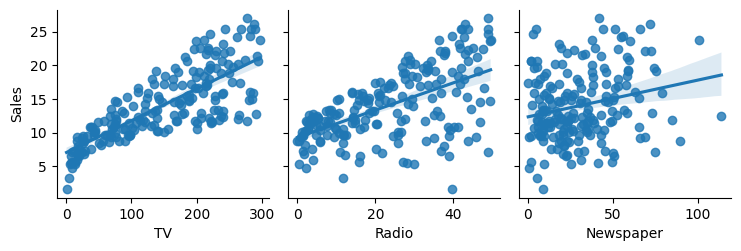

In [14]:
sns.pairplot(data=df,x_vars=['TV', 'Radio', 'Newspaper'],y_vars='Sales',palette="pastel",kind='reg')
plt.show()

## Scatter Plot

<ipython-input-15-0abd6de30b57>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col],y=df['Sales'],palette='mako')
<ipython-input-15-0abd6de30b57>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col],y=df['Sales'],palette='mako')
<ipython-input-15-0abd6de30b57>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df[col],y=df['Sales'],palette='mako')


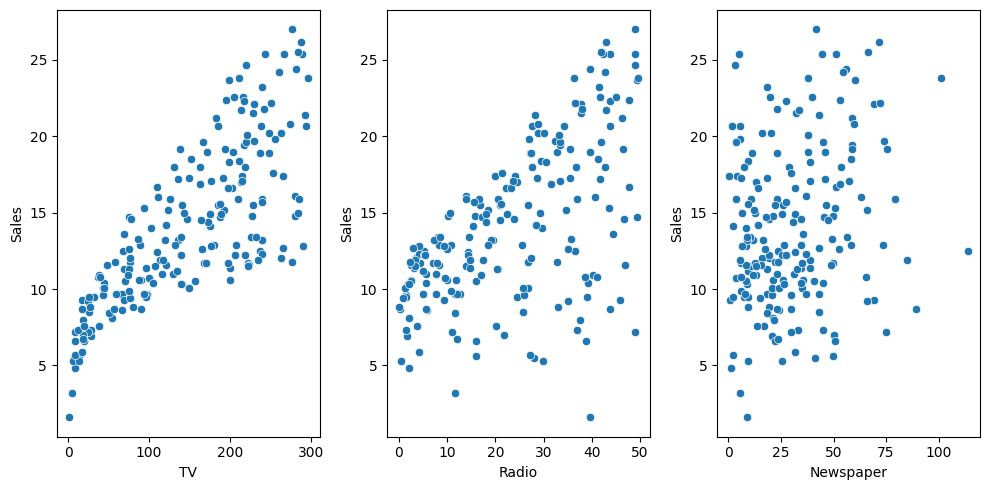

In [15]:
plt.figure(figsize=(10,5))
columns = {0:'TV',1:'Radio',2:'Newspaper'}
for plot,col in columns.items():
  plt.subplot(1,3,plot+1)
  sns.scatterplot(x=df[col],y=df['Sales'],palette='mako')
plt.tight_layout()
plt.show();

## Train Test Split & Scale Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mms = MinMaxScaler()

In [20]:
X_sc = mms.fit_transform(X)

In [21]:
X = pd.DataFrame(X_sc,columns=['TV', 'Radio', 'Newspaper'])

In [22]:
X_train , X_test, y_train , y_test =train_test_split(X,y,random_state=101, test_size=0.25)

## Build KNN Model

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
knn=KNeighborsRegressor(n_neighbors=3)

In [25]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
y_pred = knn.predict(X_test)

## Evaluation

In [27]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [28]:
mse = metrics.mean_squared_error(y_test,y_pred)
R2 =r2_score(y_test,y_pred)

In [29]:
print(f'MSE is: \n',mse)
print(f'R2_score is \n',R2)

MSE is: 
 0.932444444444445
R2_score is 
 0.9666912941521343




*   MSE = 0.9324
*   R2_score = 0.9667

## In summary, based on these metrics, it seems like the regression model is performing well in terms of accuracy and goodness of fit to the data.

## Choose the best K value by elbow method

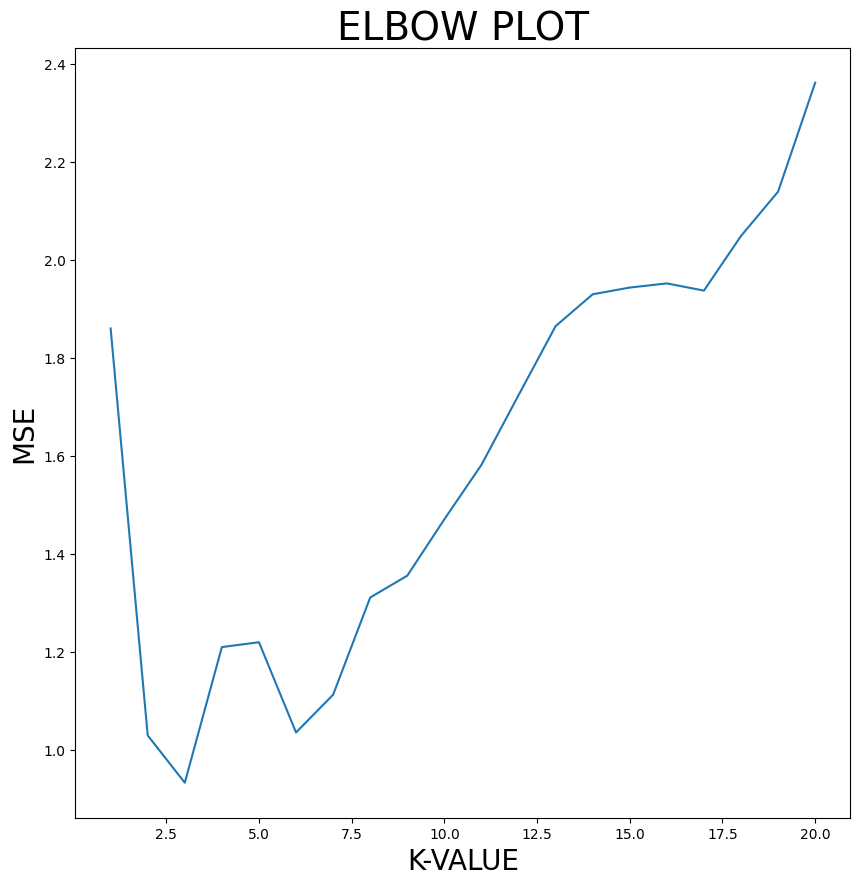

In [32]:
# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Define the range of k values
k_list = np.arange(1, 21, 1)

# Dictionary to store k and mse pairs
knn_dict = {}

# Loop through each k value
for k in k_list:
    # Create KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    model_knn = knn.fit(X_train, y_train)

    # Predict using the model
    y_knn_pred = model_knn.predict(X_test)

    # Calculate and store MSE
    mse = metrics.mean_squared_error(y_test, y_knn_pred)
    knn_dict[k] = mse

# Plot the results
ax.plot(np.array(list(knn_dict.keys())), np.array(list(knn_dict.values())))
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE', fontsize=20)
ax.set_title('ELBOW PLOT', fontsize=28)

# Show the plot
plt.show()

## It seems that for K=3 the minimum mse occurs.